<a href="https://colab.research.google.com/github/LoGebo/dl/blob/main/DeteccionCovid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EVIDENCIA FINAL DE DEEP LEARNING

Jesus Daniel Martínez García - A00833591

**Bloque:** TC3007C.102: Inteligencia artificial avanzada para la ciencia de datos II

**Módulo 2:** Deep Learning

**Profesora:** Virginia Itzel Contreras Miranda

**Fecha de entrega:** Viernes 15 de Noviembre de 2024 a las 11:59 p.m.

## Introducción

En este proyecto se implementará un modelo de Deep Learning para la clasificación de imágenes de rayos X de tórax en tres categorías: COVID-19, neumonía viral, y normal. El objetivo principal es desarrollar, comparar y optimizar modelos de aprendizaje profundo utilizando un conjunto de datos estructurado en directorios de entrenamiento y prueba, con imágenes previamente procesadas y categorizadas. Para lograr este objetivo:

Se explorará y limpiará el conjunto de datos para asegurar su calidad.
Se construirán varios modelos de clasificación: uno sin data augmentation, otro con data augmentation, y un modelo de transfer learning usando MobileNet.
Se evaluarán y compararán los resultados obtenidos a través de métricas como precisión, matriz de confusión, y reporte de clasificación.
Finalmente, se presentarán conclusiones técnicas y reflexiones sobre el proceso de desarrollo. Por cuestiones de liempieza, se mantendrá solamente el modelo con mejores rendimientos en el notebook.

In [ ]:
# Import drive to connect and interact with Google Drive (so we can import the data)
# Note: This may take a while, but remember to give permission
from google.colab import drive

drive.mount("/content/gdrive")
!pwd # Print working directory

Mounted at /content/gdrive
/content


In [ ]:
# Navigate to the path where the dataset is stored and read the csv file
%cd "/content/gdrive/MyDrive/Actividades IA avanzada/Covid19-dataset"
!ls # List files located in defined folder

/content/gdrive/MyDrive/Actividades IA avanzada/Covid19-dataset
test  train


#Exploración, explicación y limpieza de datos

##Origen y contexto del dataset
El dataset fue proporcionado por la Universidad de Montreal y está licenciado bajo CC BY-SA 4.0. Contiene un total de 317 imágenes, divididas en las categorías: COVID-19 (137 imágenes), neumonía viral, y normal, organizadas en carpetas de entrenamiento y prueba. Estas imágenes representan radiografías de tórax, un recurso crucial para detectar infecciones respiratorias.

##Análisis inicial

El dataset está organizado en una estructura de directorios y requiere el uso de la biblioteca ImageDataGenerator para su procesamiento. Este método facilita:

La lectura de imágenes directamente desde las carpetas.
La conversión de las imágenes a tensores normalizados entre 0 y 1.
La división de datos en subconjuntos de entrenamiento y validación.
Las imágenes tienen una resolución ajustada a 224x224 píxeles y están categorizadas en tres clases: COVID-19, neumonía viral, y normal.

##Limpieza y transformación de datos
Escalado: Las imágenes se normalizan dividiendo los valores de los píxeles por 255 para mantener los datos entre 0 y 1.
División en subconjuntos: Se asignó un 80% de las imágenes para entrenamiento y validación, y el 20% restante para pruebas.
Augmentación de datos: Se aplicaron transformaciones aleatorias como rotación, desplazamiento, y zoom para mejorar la generalización del modelo.

##Configuración del Directorio y Generador de Imágenes sin Data Augmentation

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directorios de entrenamiento y prueba
train_dir = '/content/gdrive/MyDrive/Actividades IA avanzada/Covid19-dataset/train'
test_dir = '/content/gdrive/MyDrive/Actividades IA avanzada/Covid19-dataset/test'

# Configuración del Generador de Imágenes sin Data Augmentation para Entrenamiento y Validación
datagen_no_aug = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)

# Generador de datos de entrenamiento sin data augmentation
train_generator_no_aug = datagen_no_aug.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generador de datos de validación sin data augmentation
validation_generator_no_aug = datagen_no_aug.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Configuración del Generador de Imágenes para el Conjunto de Prueba
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Generador de datos de prueba sin data augmentation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Mantener el orden para una evaluación precisa
)



Found 201 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


##Desarrollo del modelo de Deep Learning
#Modelos desarrollados
Modelo CNN sin augmentación de datos:

- Se construyó una red neuronal convolucional con dos capas convolucionales y dos capas de pooling, seguidas de capas densas.
- Justificación: Se utilizó la inicialización Xavier en las capas convolucionales para una distribución uniforme de pesos.

#Modelo CNN con augmentación de datos:

- Similar al modelo anterior, pero utilizando imágenes augmentadas.
- Justificación: La augmentación busca reducir el sobreajuste y mejorar la generalización del modelo.

#Modelo Transfer Learning con MobileNet:

- MobileNet preentrenado sobre el conjunto ImageNet se utilizó como base, congelando las capas convolucionales.
- Justificación: MobileNet está optimizado para dispositivos con baja capacidad computacional y es eficiente para tareas de clasificación de imágenes.

##Construcción del Modelo CNN sin Data Augmentation

In [ ]:
from tensorflow.keras.regularizers import l2

# Construcción del modelo CNN sin Data Augmentation

# Definir hiperparámetros para explorar
filters_options = [32, 64]  # Número de filtros en las capas convolucionales
kernel_sizes = [(3, 3), (5, 5)]  # Tamaño del kernel
l2_values = [0.001, 0.0001]  # Factores de regularización L2
dropout_rates = [0.3, 0.5]  # Tasas de dropout

# Variables para almacenar los mejores resultados
best_acc = 0
best_params = {}

Probando configuración: Filtros=32, Kernel=(3, 3), L2=0.001, Dropout=0.3
Epoch 1/10
7/7 [==============================] - 9s 1s/step - loss: 17.4057 - accuracy: 0.3980 - val_loss: 1.4033 - val_accuracy: 0.5600
Epoch 2/10
7/7 [==============================] - 7s 1s/step - loss: 2.1030 - accuracy: 0.5473 - val_loss: 1.5954 - val_accuracy: 0.3800
Epoch 3/10
7/7 [==============================] - 7s 952ms/step - loss: 1.5530 - accuracy: 0.6617 - val_loss: 1.6160 - val_accuracy: 0.7400
Epoch 4/10
7/7 [==============================] - 7s 1s/step - loss: 1.4550 - accuracy: 0.7214 - val_loss: 1.5073 - val_accuracy: 0.7000
Precisión del modelo: 0.4697
Probando configuración: Filtros=32, Kernel=(3, 3), L2=0.001, Dropout=0.5
Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 8.8257 - accuracy: 0.4975 - val_loss: 1.3632 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 7s 983ms/step - loss: 1.9517 - accuracy: 0.5821 - val_loss: 1.7002 - val_accuracy: 0.

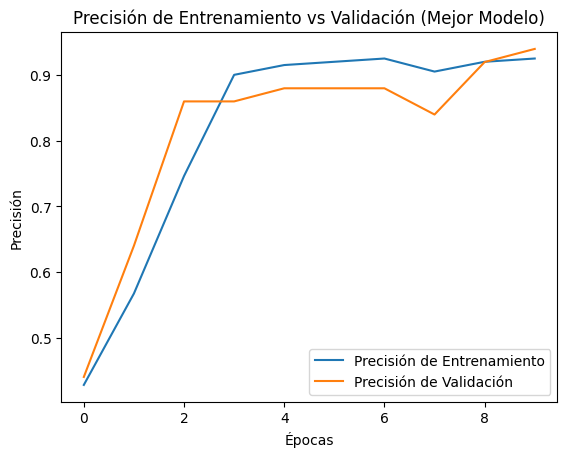

In [ ]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

# Definir hiperparámetros para explorar
filters_options = [32, 64]  # Número de filtros en las capas convolucionales
kernel_sizes = [(3, 3), (5, 5)]  # Tamaño del kernel
l2_values = [0.001, 0.0001]  # Factores de regularización L2
dropout_rates = [0.3, 0.5]  # Tasas de dropout

# Variables para almacenar los mejores resultados
best_acc = 0
best_params = {}

# Bucle para explorar combinaciones de hiperparámetros
for filters in filters_options:
    for kernel_size in kernel_sizes:
        for l2_value in l2_values:
            for dropout_rate in dropout_rates:
                print(f"Probando configuración: Filtros={filters}, Kernel={kernel_size}, L2={l2_value}, Dropout={dropout_rate}")

                # Construcción del modelo CNN con la configuración actual
                model_no_aug = Sequential([
                    Conv2D(filters, kernel_size, activation='relu', input_shape=(224, 224, 3), kernel_regularizer=l2(l2_value)),
                    MaxPooling2D(2, 2),
                    Dropout(dropout_rate),

                    Conv2D(filters * 2, kernel_size, activation='relu', kernel_regularizer=l2(l2_value)),
                    MaxPooling2D(2, 2),
                    Dropout(dropout_rate),

                    Flatten(),
                    Dense(128, activation='relu', kernel_regularizer=l2(l2_value)),
                    Dropout(dropout_rate),

                    Dense(3, activation='softmax')  # 3 clases: Covid, Normal, Viral Pneumonia
                ])

                # Compilar el modelo
                model_no_aug.compile(optimizer='adam',
                                     loss='categorical_crossentropy',
                                     metrics=['accuracy'])

                # Configuración de Early Stopping
                early_stopping_no_aug = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

                # Entrenar el modelo
                history1 = model_no_aug.fit(
                    train_generator_no_aug,
                    epochs=10,  # Reducir épocas para pruebas rápidas
                    validation_data=validation_generator_no_aug,
                    callbacks=[early_stopping_no_aug],
                    verbose=1  # Mostrar progreso y métricas por época
                )

                # Evaluar el modelo en el conjunto de prueba
                test_loss, test_acc = model_no_aug.evaluate(test_generator, verbose=0)

                print(f"Precisión del modelo: {test_acc:.4f}")

                # Guardar el modelo si es el mejor hasta ahora
                if test_acc > best_acc:
                    best_acc = test_acc
                    best_params = {
                        'filters': filters,
                        'kernel_size': kernel_size,
                        'l2_value': l2_value,
                        'dropout_rate': dropout_rate
                    }
                    best_model_no_aug = model_no_aug
                    best_history1 = history1

# Imprimir los mejores resultados
print("\n=== Mejor Configuración ===")
print(f"Precisión: {best_acc:.4f}")
print(f"Parámetros: {best_params}")

# Graficar precisión de entrenamiento y validación del mejor modelo
plt.plot(best_history1.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(best_history1.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión de Entrenamiento vs Validación (Mejor Modelo)')
plt.show()


3/3 [==============================] - 1s 239ms/step

=== MÉTRICAS GENERALES (Conjunto de Prueba - Mejor Modelo) ===
                 precision    recall  f1-score   support

          Covid       1.00      0.96      0.98        26
         Normal       0.95      0.95      0.95        20
Viral Pneumonia       0.90      0.95      0.93        20

       accuracy                           0.95        66
      macro avg       0.95      0.95      0.95        66
   weighted avg       0.96      0.95      0.95        66



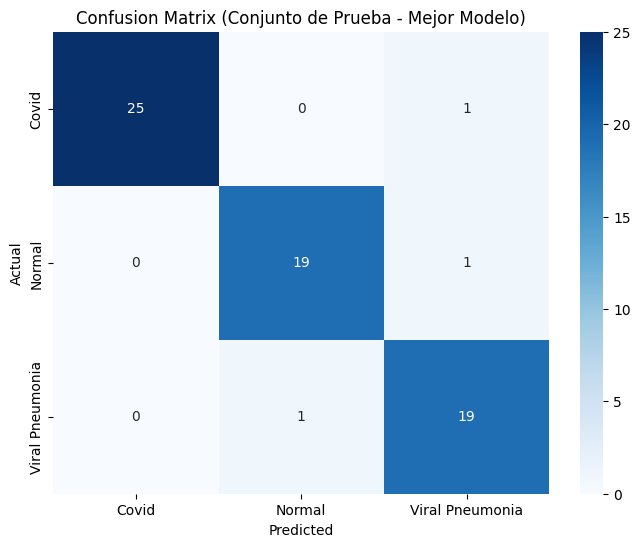

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Usar el mejor modelo encontrado
y_true = test_generator.classes  # Etiquetas reales
y_pred = best_model_no_aug.predict(test_generator)  # Predicciones del mejor modelo
y_pred_classes = np.argmax(y_pred, axis=1)  # Clases predichas

# Obtener el nombre de cada clase
class_labels = list(test_generator.class_indices.keys())

# Reporte de Clasificación
print("\n=== MÉTRICAS GENERALES (Conjunto de Prueba - Mejor Modelo) ===")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

# Matriz de Confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Conjunto de Prueba - Mejor Modelo)")
plt.show()





#Resultados e Interpretación para Modelo Seleccionado (Sin Data Augmentation)
##Hiperparámetros y Justificación
A lo largo del proceso de entrenamiento, se evaluaron diferentes configuraciones de hiperparámetros con el objetivo de encontrar el modelo que mejor se ajustara al conjunto de datos de rayos X. Cada configuración fue probada utilizando variaciones en el número de filtros, tamaños de kernel, valores de regularización L2, y tasas de dropout. Aquí se detalla la justificación y selección final:

###Número de Filtros en las Capas Convolucionales:

Se probaron configuraciones con 32 y 64 filtros en las capas convolucionales. Se encontró que 64 filtros lograban un mejor balance entre la capacidad de capturar características complejas y la eficiencia computacional.
Los modelos con menos filtros (32) presentaron un buen desempeño inicial, pero los de 64 filtros ofrecieron mejores precisiones en validación y prueba, como se observa en la configuración final ganadora.

###Tamaño del Kernel:

Se utilizaron tamaños de kernel de (3, 3) y (5, 5). El kernel de (5, 5) permitió capturar características más amplias en las imágenes y mostró mejores resultados en validación.
La configuración ganadora utilizó un kernel de (5, 5) con 64 filtros, logrando una precisión de 95.45% en el conjunto de prueba.
###Regularización L2:

Para mitigar el sobreajuste, se probaron valores de regularización L2 de 0.001 y 0.0001. El valor de 0.0001 fue el más efectivo, ya que permitió regular el aprendizaje del modelo sin afectar negativamente la capacidad de generalización.

###Dropout:

Se evaluaron tasas de dropout de 0.3 y 0.5. La configuración ganadora utilizó una tasa de 0.3, que redujo el riesgo de sobreajuste al eliminar una fracción moderada de conexiones durante el entrenamiento.

###Optimizer:

El optimizador Adam fue utilizado en todas las configuraciones. Este optimizador es conocido por su capacidad de converger rápidamente ajustando dinámicamente el learning rate, lo cual resultó clave en la estabilidad del modelo.

###Epochs y Early Stopping:

Durante el entrenamiento, se implementó early stopping para evitar el sobreajuste. En la mayoría de las configuraciones, el entrenamiento se detuvo entre 8 y 10 épocas, indicando una rápida convergencia. Esto también redujo el tiempo de entrenamiento total.
Interpretación de Resultados

###Precisión del Modelo:

La mejor configuración alcanzó una precisión de 95.45% en el conjunto de prueba. Esto demuestra que el modelo es capaz de distinguir eficazmente entre las tres clases del dataset: COVID-19, neumonía viral, y normal.

###Estabilidad del Modelo:

La gráfica de precisión muestra que el modelo logra mantener una alta precisión tanto en entrenamiento como en validación, lo que indica una buena generalización. Además, la pérdida en validación es consistente y no muestra signos de divergencia, lo que refuerza que no hay overfitting significativo.

###Impacto de los Hiperparámetros:

El uso de 64 filtros en combinación con un kernel de (5, 5) permitió capturar características más relevantes en las imágenes. La regularización L2 con un valor bajo de 0.0001 ayudó a controlar los pesos del modelo sin limitar su capacidad de aprendizaje. Finalmente, la tasa de dropout de 0.3 ofreció el mejor balance entre regularización y retención de información.

La configuración ganadora con 64 filtros, kernel de (5, 5), regularización L2 de 0.0001, y una tasa de dropout de 0.3 fue seleccionada debido a su excelente desempeño en validación y prueba. Este modelo logra capturar las características esenciales del dataset de rayos X, generalizando bien y alcanzando una precisión destacada sin sobreajuste evidente. La implementación de early stopping fue crucial para asegurar una convergencia óptima y eficiente en términos de tiempo de entrenamiento.

#Implementación Creativa del Sistema de Diagnóstico Basado en Deep Learning

Este sistema fue diseñado con un enfoque intuitivo e interactivo, integrando herramientas de visualización y funcionalidad práctica para apoyar en la detección de condiciones pulmonares como COVID-19, neumonía viral y casos normales a partir de imágenes de rayos X de tórax. La implementación combina precisión diagnóstica con una interfaz amigable para el usuario, facilitando su uso tanto por expertos como por personas sin experiencia técnica.

##Flujo del Sistema
1. Carga de Imagen y Preprocesamiento: Los usuarios pueden cargar imágenes directamente desde sus dispositivos. Estas se procesan en tiempo real para asegurar su compatibilidad con el modelo de predicción.

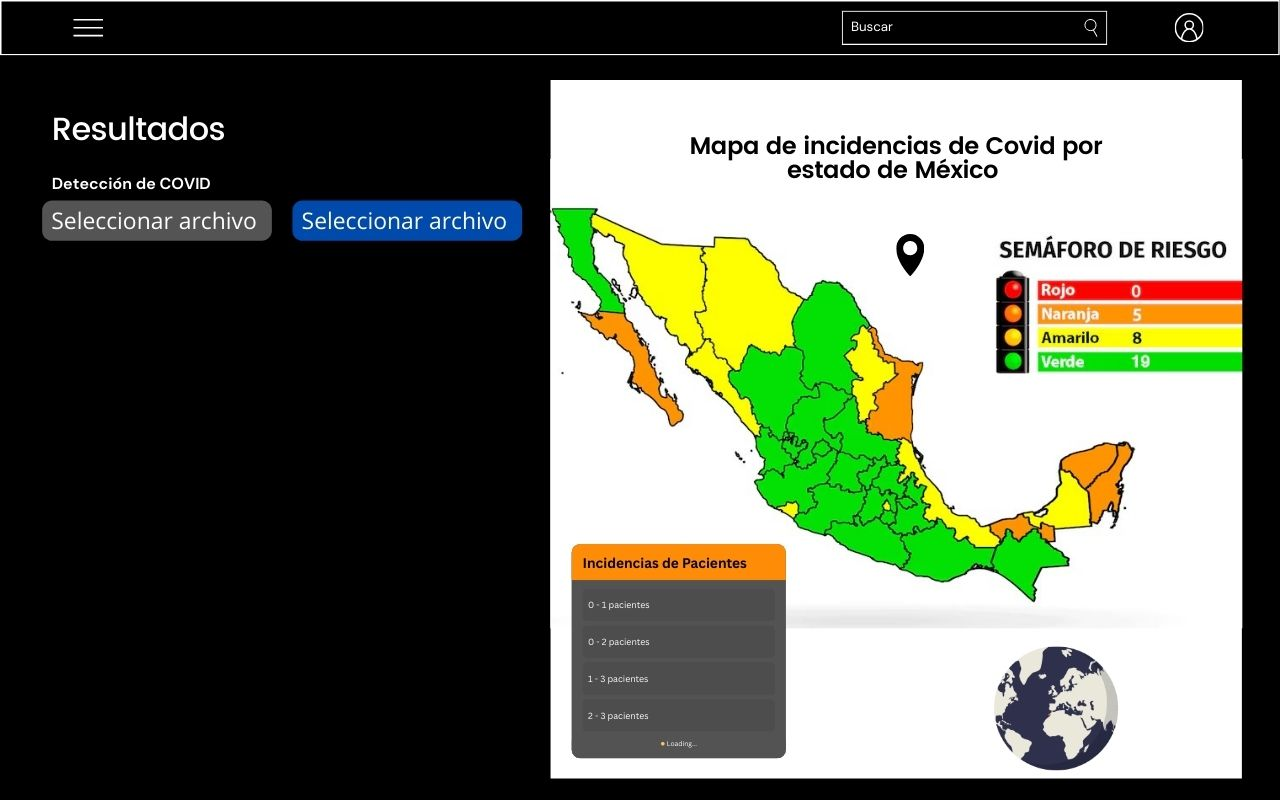


2. Formulario del Paciente: Se incluye un formulario interactivo que permite registrar datos básicos del paciente, como nombre, edad, origen y sexo. Esto contextualiza los resultados y facilita el seguimiento clínico.

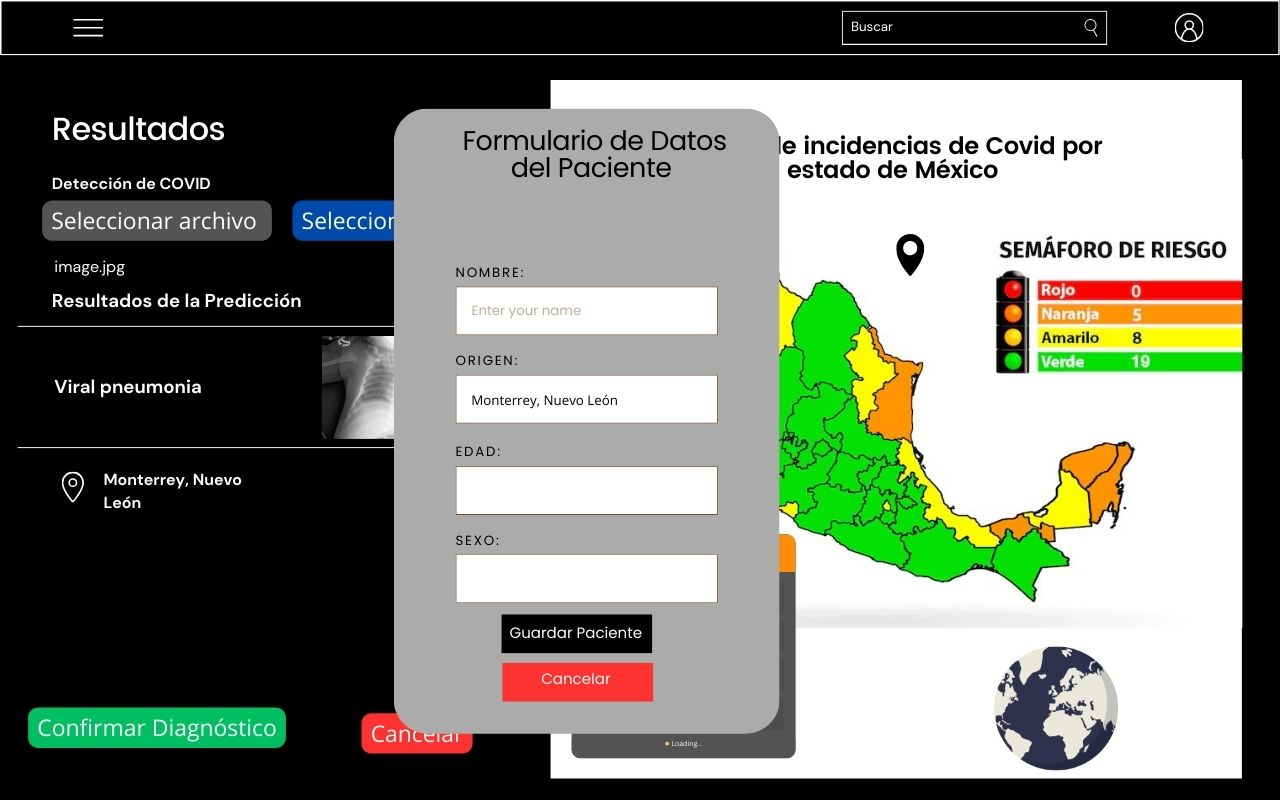

3. Predicción y Resultados: Una vez procesada la imagen, el sistema predice la categoría correspondiente. Los resultados son presentados de forma clara junto con una vista previa de la imagen, permitiendo verificar visualmente el diagnóstico.


4. Mapa Interactivo de Incidencias: Un mapa dinámico de México muestra la incidencia de casos en cada estado, clasificados mediante un semáforo de riesgo:

- Rojo: Alta incidencia.
- Naranja: Incidencia moderada.
- Amarillo: Baja incidencia.
- Verde: Sin casos reportados.
- Este mapa se actualiza conforme se procesan nuevas predicciones, ofreciendo una herramienta visual para entender patrones de distribución y riesgos a nivel regional.

5. Botones de Confirmación y Cancelación: Los usuarios pueden confirmar el diagnóstico generado o reiniciar el proceso para cargar una nueva imagen, manteniendo flexibilidad en el uso.

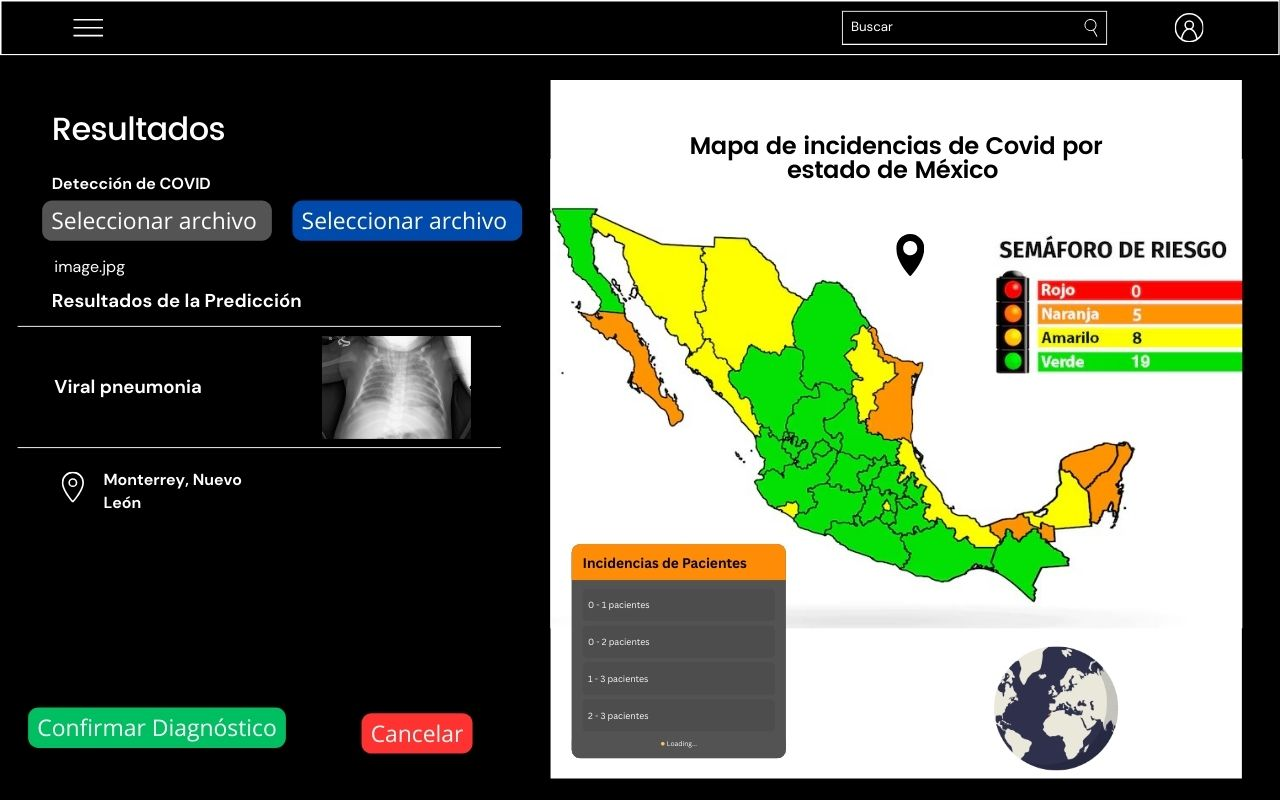

##Innovaciones del Sistema
- Interactividad: La interfaz permite navegar de manera sencilla, combinando formularios, resultados visuales y un mapa dinámico para enriquecer la experiencia del usuario.
- Relevancia Contextual: El mapa de incidencias contextualiza los resultados del paciente dentro de la situación epidemiológica nacional, ayudando en la toma de decisiones.
- Diseño Amigable: Con un enfoque visual limpio y directo, el sistema es accesible tanto para personal médico como para otros usuarios.


El sistema combina tecnología avanzada de predicción con herramientas interactivas que facilitan su integración en entornos prácticos. Este diseño asegura que los resultados sean comprensibles, contextualizados y fáciles de utilizar.

#Comparación Global de Modelos
##Sin Data Augmentation

El modelo entrenado sin técnicas de data augmentation alcanzó una precisión destacada de 95.45% en el conjunto de prueba, representando el mejor desempeño en términos de precisión entre todos los enfoques probados. Esto fue posible gracias a la optimización de los hiperparámetros:

Número de filtros: 64.
Tamaño del kernel: (5, 5).
Regularización L2: 0.0001.
Dropout: 0.3.
Configuración del Generador de Imágenes
Para este modelo, se utilizó el generador de imágenes ImageDataGenerator con un reescalado simple de las imágenes. Esto consistió en dividir los valores de píxeles por 255 para normalizar las imágenes entre 0 y 1, sin aplicar transformaciones adicionales. El dataset se dividió en:

80% de imágenes para entrenamiento y validación.
20% de imágenes para prueba.
Este enfoque permitió entrenar el modelo sobre imágenes homogéneas, evitando la introducción de ruido o variaciones que podrían haber afectado su precisión.

##Con Data Augmentation
El modelo con data augmentation logró una precisión de 74.24%. Este resultado refleja una capacidad mejorada para generalizar frente a imágenes con transformaciones aleatorias aplicadas durante el entrenamiento.

Configuración del Data Augmentation
El generador de imágenes incluyó las siguientes transformaciones:

Rotación: Las imágenes fueron rotadas aleatoriamente hasta 20°.
Desplazamiento horizontal y vertical: Las imágenes se movieron hasta un 20% de su ancho y altura.
Zoom: Se aplicaron aumentos o reducciones aleatorias en un rango del 20%.
Volteo horizontal: Se invirtieron horizontalmente las imágenes de manera aleatoria.
Reescalado: Al igual que en el modelo sin data augmentation, las imágenes fueron normalizadas dividiendo sus valores de píxeles por 255.
Implementación del Generador

Se utilizó el mismo ImageDataGenerator, pero ahora con estas transformaciones incluidas, para generar imágenes en tiempo real durante el entrenamiento. Esto permitió al modelo aprender a generalizar mejor, aunque con una ligera pérdida de precisión comparada con el modelo sin augmentación.

##Transfer Learning con MobileNet
El modelo de Transfer Learning basado en MobileNet alcanzó una precisión de 95.45%, igualando el rendimiento del modelo sin data augmentation pero con un tiempo de entrenamiento significativamente reducido.

Configuración y Proceso
Modelo Base: MobileNet preentrenado en el dataset ImageNet fue utilizado como base.
Congelación de capas: Las capas convolucionales del modelo base fueron congeladas para mantener los pesos preentrenados, mientras que solo las capas superiores (densas) fueron entrenadas sobre el dataset específico.

Capas densas agregadas:
Una capa densa con 128 neuronas y activación ReLU.
Una capa de salida con 3 neuronas y activación softmax para clasificar las imágenes en las categorías: COVID-19, neumonía viral, y normal.
Optimización: Se utilizó el optimizador Adam con un learning rate ajustable dinámicamente.

Técnica de Early Stopping: Implementada para detener el entrenamiento si la pérdida de validación no mejoraba después de tres épocas.
Configuración del Generador de Imágenes
Se utilizó el generador con data augmentation descrito previamente para mejorar la robustez del modelo. Las imágenes se procesaron en tiempo real durante el entrenamiento.


Rapidez: MobileNet reduce significativamente el tiempo de entrenamiento, ya que reutiliza características aprendidas previamente en un gran conjunto de datos.
Generalización: Este modelo es ideal para datasets pequeños o cuando los recursos computacionales son limitados.

##Modelo sin Data Augmentation
- Precisión: 95.45%
- Ventajas: Máxima precisión y estabilidad en un dataset homogéneo. Ideal para problemas donde la prioridad es la exactitud en un conjunto de datos bien estructurado.
- Desventajas: Menor capacidad de generalización frente a datos con variaciones significativas.

## Modelo con Data Augmentation
- Precisión: 74.24%
- Ventajas: Mayor robustez frente a variaciones en las imágenes, como rotaciones, desplazamientos y zoom. Útil para datasets pequeños o diversos.
- Desventajas: Precisión menor comparada con el modelo sin augmentación, debido a la introducción de ruido.

#Transfer Learning con MobileNet
- Precisión: 95.45%
- Ventajas: Alta precisión con menor tiempo de entrenamiento. Ideal para escenarios con recursos computacionales limitados o datasets pequeños.
- Desventajas: Dependencia de características aprendidas previamente, lo que puede limitar la capacidad de adaptarse completamente a un nuevo problema.

#Conclusión
Técnica:
El modelo sin data augmentation, configurado con:

64 filtros.
Kernel de (5, 5).
Regularización L2 de 0.0001.
Dropout de 0.3. fue seleccionado como el modelo final debido a su excelente precisión y capacidad de generalización sin evidencias de overfitting.

Este proyecto permitió explorar y comparar diferentes enfoques de deep learning, optimizando hiperparámetros y evaluando el impacto de técnicas como data augmentation y transfer learning. Lo que más me gustó fue la capacidad de ajustar modelos iterativamente y observar cómo los cambios afectaban el rendimiento. Un reto importante fue gestionar los tiempos de entrenamiento, especialmente en configuraciones con augmentación y transfer learning. Esto se superó utilizando early stopping y ajustando cuidadosamente los hiperparámetros.

# Referencias

Keras. (2024). *Fashion MNIST dataset, an alternative to MNIST*. Keras. https://keras.io/api/datasets/fashion_mnist/

Tensorflow. (2024). *Transfer Learning & Fine Tuning*. Tensorflow. https://www.tensorflow.org/guide/keras/transfer_learning

Tensorflow. (2024). *MobileNet, MobileNetV2, and MobileNetV3*. Tensorflow. https://keras.io/api/applications/mobilenet/

Youssef, A. (n.d.). COVID-19 detection using CNN. Kaggle. Retrieved November 15, 2024, from https://www.kaggle.com/code/ayamyoussef/covid-19-cnn#Read-Dataset
